In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def plot_traj(my, ethalon):
    my_table = pd.read_csv(my, sep='\t', header=None)
    eth_table = pd.read_csv(ethalon, sep='\t', header=None)
    plt.plot(my_table.iloc[:,1], my_table.iloc[:,2], label="my")
    plt.plot(eth_table.iloc[:,1], eth_table.iloc[:,2], label="etalon")
    plt.legend()

In [3]:
df_1 = pd.read_csv("etalon_traj1.txt", sep='\t', header=None)
df_2 = pd.read_csv("traj1.txt", sep='\t', header=None)
df_1

,0,1,2,3
0,0.0,1.000000,0.000000e+00,0.0
1,0.1,0.997191,8.991576e-02,0.0
2,0.2,0.988800,1.793288e-01,0.0
3,0.3,0.974934,2.677503e-01,0.0
4,0.4,0.955768,3.547176e-01,0.0
...,...,...,...,...
196,19.6,0.955768,-3.547176e-01,0.0
197,19.7,0.974934,-2.677502e-01,0.0
198,19.8,0.988800,-1.793288e-01,0.0
199,19.9,0.997191,-8.991575e-02,0.0


In [4]:
concated = pd.merge(df_1, df_2, on=0, suffixes=("ethalon", "calculated"))
concated.head()

,0,1ethalon,2ethalon,3ethalon,1calculated,2calculated,3calculated
0,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0
1,0.1,0.997191,0.089916,0.0,0.996909,0.089917,0
2,0.2,0.988800,0.179329,0.0,0.988233,0.179330,0
3,0.3,0.974934,0.267750,0.0,0.974077,0.267750,0
4,0.4,0.955768,0.354718,0.0,0.954611,0.354712,0


$$
 \mathbb{E}[\sqrt{<(calc-true),(calc-true)>}]
$$

In [5]:
concated["ae"] = np.sqrt((concated["1ethalon"] - concated["1calculated"])**2 + (concated["2ethalon"] - concated["2calculated"])**2)
concated.head()

,0,1ethalon,2ethalon,3ethalon,1calculated,2calculated,3calculated,ae
0,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0,0.000000
1,0.1,0.997191,0.089916,0.0,0.996909,0.089917,0,0.000282
2,0.2,0.988800,0.179329,0.0,0.988233,0.179330,0,0.000567
3,0.3,0.974934,0.267750,0.0,0.974077,0.267750,0,0.000857
4,0.4,0.955768,0.354718,0.0,0.954611,0.354712,0,0.001157


In [6]:
concated.ae.mean()

np.float64(0.01449374342944854)

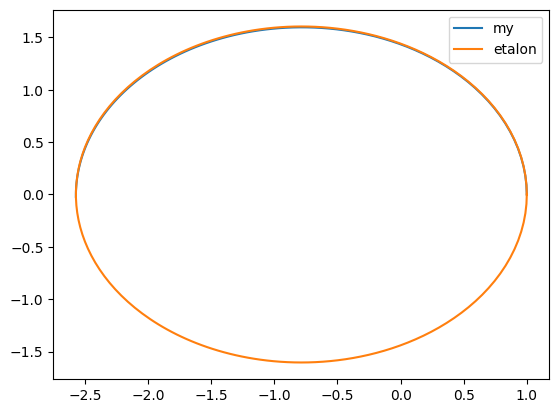

In [7]:
plot_traj("traj1.txt", "etalon_traj1.txt")

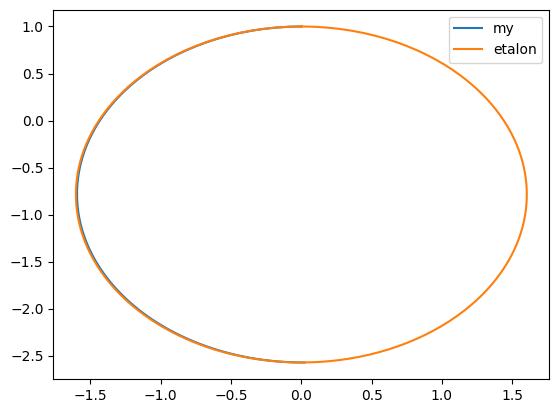

In [8]:
plot_traj("traj2.txt", "etalon_traj2.txt")

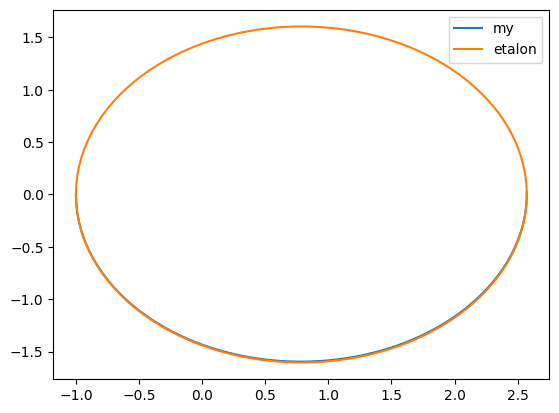

In [9]:
plot_traj("traj3.txt", "etalon_traj3.txt")

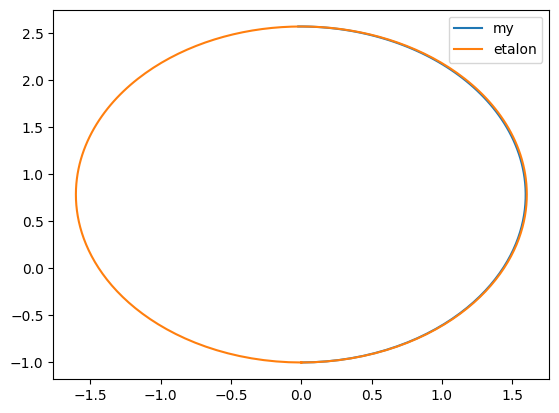

In [10]:
plot_traj("traj4.txt", "etalon_traj4.txt")